## Importing Necessary Libraries

In [203]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("Customer_data.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Preprocessing the data

In [4]:
# Customer id wont be of any use to us
df.drop("customerID",axis=1,inplace=True)

In [265]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
### While running pd.to_numeric(df["TotalCharges"]), error is rasied as some values in totalcharges are "' '"

In [9]:
# coerce:- converts all to numeric apart from all those values that
# raise an error in which case it is converted into a nan
pd.to_numeric(df["TotalCharges"],errors="coerce").isnull().sum()# finding number of emtpy spaces in total charges

11

In [10]:
# These are the records with empty total charges
df[pd.to_numeric(df["TotalCharges"],errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# Removing them
df1 = df[df["TotalCharges"] != " "]
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting TotalCharges column to numeric from Object type

In [13]:
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])

<ipython-input-13-1974c66aef93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])


In [267]:
df1["TotalCharges"].dtypes

dtype('float64')

In [15]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Visvuasiling some parts of the data to get an idea of it

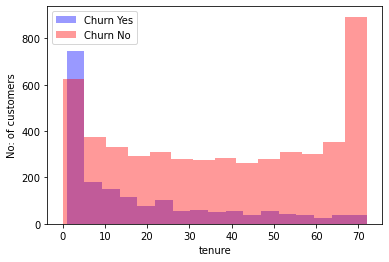

In [20]:
sns.distplot(df[df["Churn"]=="Yes"]["tenure"],label = "Churn Yes",kde = False,color= "blue")
sns.distplot(df[df["Churn"]=="No"]["tenure"],label = "Churn No",kde = False,color = "red")
plt.ylabel("No: of customers")
plt.legend(loc = "best" )

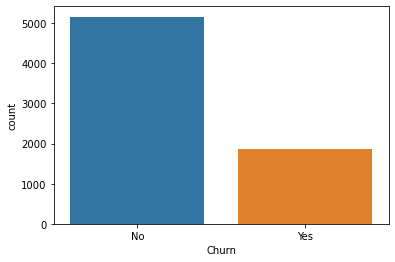

In [46]:
sns.countplot(df1["Churn"])

##### Dataset seems to be highly imbalanced, we will fix it later

<ipython-input-21-99be1710f21a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist([df1[df["Churn"] == "Yes"]["TotalCharges"],df1[df["Churn"] == "No"]["TotalCharges"]],label=["Churn Yes","Churn No"])


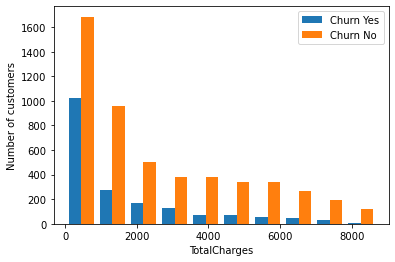

In [21]:
plt.hist([df1[df["Churn"] == "Yes"]["TotalCharges"],df1[df["Churn"] == "No"]["TotalCharges"]],label=["Churn Yes","Churn No"])
plt.xlabel("TotalCharges")
plt.ylabel("Number of customers")
plt.legend()

<ipython-input-23-e1e71d3d23be>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist([df1[df["Churn"] == "Yes"]["MonthlyCharges"],df1[df["Churn"] == "No"]["MonthlyCharges"]],label=["Churn Yes","Churn No"])
C:\Users\amalr\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


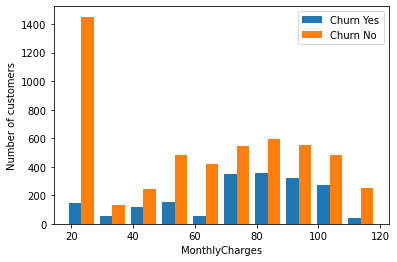

In [23]:
plt.hist([df1[df["Churn"] == "Yes"]["MonthlyCharges"],df1[df["Churn"] == "No"]["MonthlyCharges"]],label=["Churn Yes","Churn No"])
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of customers")
plt.legend()

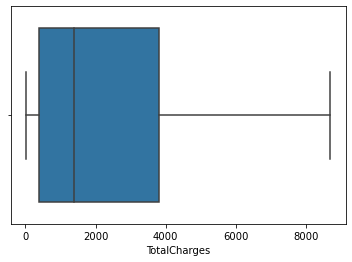

In [42]:
sns.boxplot(df1['TotalCharges'])

In [39]:
df1["SeniorCitizen"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

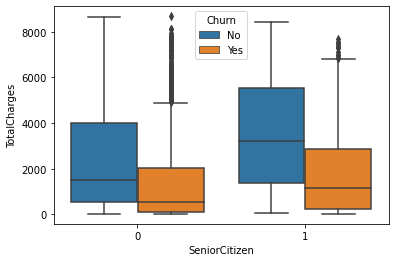

In [41]:
sns.boxplot(df1["SeniorCitizen"],df1["TotalCharges"],hue=df1["Churn"])

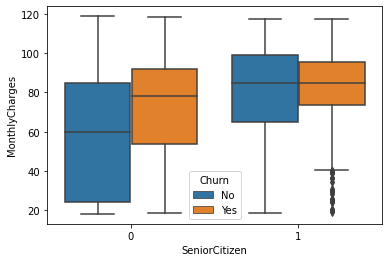

In [43]:
sns.boxplot(df1["SeniorCitizen"],df1["MonthlyCharges"],hue=df1["Churn"])

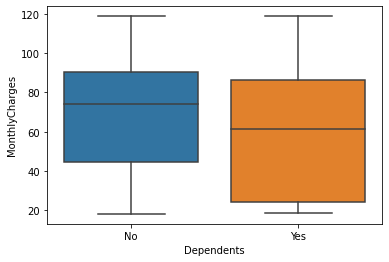

In [48]:
sns.boxplot(df1["Dependents"],df1["MonthlyCharges"])

### Checking out the values of columns of object type
### We want to encode these columns to numerical values

In [54]:
def print_unique_cols(df):
    for i in df.columns:
        if df[i].dtype == "object":
            print(f"{i} --> {df1[i].unique()}")

In [55]:
print_unique_cols(df1)

gender --> ['Female' 'Male']
Partner --> ['Yes' 'No']
Dependents --> ['No' 'Yes']
PhoneService --> ['No' 'Yes']
MultipleLines --> ['No phone service' 'No' 'Yes']
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> ['No' 'Yes' 'No internet service']
OnlineBackup --> ['Yes' 'No' 'No internet service']
DeviceProtection --> ['No' 'Yes' 'No internet service']
TechSupport --> ['No' 'Yes' 'No internet service']
StreamingTV --> ['No' 'Yes' 'No internet service']
StreamingMovies --> ['No' 'Yes' 'No internet service']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> ['Yes' 'No']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --> ['No' 'Yes']


##### This much columns need encoding

In [59]:
# From the above output
# The value "No internet service" can be assumed to be a simple "No"
# Lets do it
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

In [60]:
print_unique_cols(df1) # we can see the changes made here

gender --> ['Female' 'Male']
Partner --> ['Yes' 'No']
Dependents --> ['No' 'Yes']
PhoneService --> ['No' 'Yes']
MultipleLines --> ['No' 'Yes']
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> ['No' 'Yes']
OnlineBackup --> ['Yes' 'No']
DeviceProtection --> ['No' 'Yes']
TechSupport --> ['No' 'Yes']
StreamingTV --> ['No' 'Yes']
StreamingMovies --> ['No' 'Yes']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> ['Yes' 'No']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --> ['No' 'Yes']


### Finding all columns with yes or no values

In [70]:
yes_no_columns = []
for i in df1.columns:
    if df1[i].nunique() == 2:
        if df1[i].unique()[0] in ["Yes","No"]:
            yes_no_columns.append(i)

In [71]:
yes_no_columns # These are all the columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [73]:
# Encoding those to numnerical labels
for i in yes_no_columns:
    df1[i].replace({"Yes":1,"No":0},inplace = True)

C:\Users\amalr\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [74]:
print_unique_cols(df1)# updated list of columns with values of object type

gender --> ['Female' 'Male']
InternetService --> ['DSL' 'Fiber optic' 'No']
Contract --> ['Month-to-month' 'One year' 'Two year']
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [76]:
# justing checking to see the unique values of each cols
for i in df1.columns:
    print(f"{i} --> {df1[i].unique()}")

gender --> ['Female' 'Male']
SeniorCitizen --> [0 1]
Partner --> [1 0]
Dependents --> [0 1]
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> [0 1]
MultipleLines --> [0 1]
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> [0 1]
OnlineBackup --> [1 0]
DeviceProtection --> [0 1]
TechSupport --> [0 1]
StreamingTV --> [0 1]
StreamingMovies --> [0 1]
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> [1 0]
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges --> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn --> [0 1]


In [80]:
# Label encoding the Gender column as well 
df1.gender.replace({"Female":1,"Male":0},inplace =True)

In [81]:
# Updated column values
for i in df1.columns:
    print(f"{i} --> {df1[i].unique()}")

gender --> [1 0]
SeniorCitizen --> [0 1]
Partner --> [1 0]
Dependents --> [0 1]
tenure --> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService --> [0 1]
MultipleLines --> [0 1]
InternetService --> ['DSL' 'Fiber optic' 'No']
OnlineSecurity --> [0 1]
OnlineBackup --> [1 0]
DeviceProtection --> [0 1]
TechSupport --> [0 1]
StreamingTV --> [0 1]
StreamingMovies --> [0 1]
Contract --> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --> [1 0]
PaymentMethod --> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges --> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges --> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn --> [0 1]


### Encoding the rest of the catgorical columns using One hot encoding

In [214]:
# pd.get_dummies(df1,drop_first=True)--> this would also have worked just fine
df3 = pd.get_dummies(df1,columns=["InternetService","Contract","PaymentMethod"],drop_first=True)

In [215]:
# New df size
df3.shape

(7032, 24)

In [216]:
df3.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6036,1,0,1,0,53,1,0,1,1,1,...,110.50,5835.50,0,1,0,1,0,0,1,0
4541,1,1,0,0,1,1,1,0,0,0,...,50.55,50.55,1,0,0,0,0,0,0,1
5669,0,1,1,0,43,1,0,0,1,1,...,100.55,4304.00,0,1,0,1,0,0,0,0


#### we have now converted all the columns to numerical values

In [217]:
# This is what we needed
df3.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

### Fixing the imbalance issue

#### We are doing undersampling of the more frequent class

In [218]:
df3["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [219]:
# we can see that the datatset is highly imbalanced.
n = min(len(df3[df3["Churn"] == 1]),len(df3[df3["Churn"] == 0]))
df_y = df3[df3["Churn"] == 1][:n]
df_n = df3[df3["Churn"] == 0][:n]

In [220]:
# combing the 2 dfs together
print(df_y.shape,df_n.shape)
df3 = pd.concat([df_y,df_n],axis = 0)
df3 = df3.sample(len(df3))

(1869, 24) (1869, 24)


In [221]:
# reseting the mixed up indeces
df3.reset_index(inplace=True)
df3.drop("index",axis = 1,inplace = True)
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,4,1,0,0,0,1,...,73.90,280.85,1,1,0,0,0,0,1,0
1,0,0,0,1,1,1,0,0,0,0,...,90.85,90.85,1,1,0,0,0,0,1,0
2,0,0,0,0,3,1,0,0,0,0,...,69.35,191.35,1,0,0,0,0,0,1,0
3,0,0,1,1,28,0,0,0,1,1,...,60.00,1682.05,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,24.25,24.25,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,15,1,1,0,1,0,...,100.15,1415.00,0,1,0,0,0,0,1,0
3734,1,1,0,0,41,1,0,0,0,1,...,101.10,4016.20,0,1,0,1,0,0,0,0
3735,1,0,1,1,68,1,0,0,0,0,...,19.35,1292.65,0,0,1,0,1,0,0,0
3736,0,0,0,0,12,1,1,1,1,0,...,67.25,832.30,0,0,0,0,0,0,1,0


In [222]:
# we can see the imbalance issue is fixed
df3["Churn"].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

### Normalising the continous columns to the range of 0 to 1

In [223]:
# from the array we can see that the columns tenure, monthly charges and total charges are in a different range
# So they have to be normalised
cols_toscale = ["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [224]:
df3[cols_toscale] = scaler.fit_transform(df3[cols_toscale])

In [225]:
# Scaled data
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,0.042254,1,0,0,0,1,...,0.553616,0.030239,1,1,0,0,0,0,1,0
1,0,0,0,1,0.000000,1,0,0,0,0,...,0.722693,0.008314,1,1,0,0,0,0,1,0
2,0,0,0,0,0.028169,1,0,0,0,0,...,0.508229,0.019911,1,0,0,0,0,0,1,0
3,0,0,1,1,0.380282,0,0,0,1,1,...,0.414963,0.191928,0,0,0,1,0,1,0,0
4,0,0,0,0,0.000000,0,0,0,0,0,...,0.058354,0.000629,1,0,0,0,0,0,1,0


In [226]:
# independent variables
x = df3.drop("Churn",axis =1)

In [227]:
# dependent variable
y = df3["Churn"]

### Splitting the dataset 

In [228]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [229]:
x_train.shape

(2990, 23)

In [230]:
x_test.shape

(748, 23)

## Model Creation

In [231]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [259]:
model = Sequential()
model.add(Dense(32, input_shape=(23,),activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))

In [260]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [261]:
model.fit(x_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
75/75 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.5710 - val_loss: 0.6253 - val_accuracy: 0.7692
Epoch 2/30
75/75 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.6815 - val_loss: 0.5178 - val_accuracy: 0.7759
Epoch 3/30
75/75 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.7014 - val_loss: 0.4926 - val_accuracy: 0.7793
Epoch 4/30
75/75 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7234 - val_loss: 0.4864 - val_accuracy: 0.7826
Epoch 5/30
75/75 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7474 - val_loss: 0.4818 - val_accuracy: 0.7876
Epoch 6/30
75/75 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.7626 - val_loss: 0.4803 - val_accuracy: 0.7843
Epoch 7/30
75/75 [==============================] - 0s 1ms/step - loss: 0.5254 - accuracy: 0.7478 - val_loss: 0.4747 - val_accuracy: 0.7809
Epoch 8/30
75/75 [==

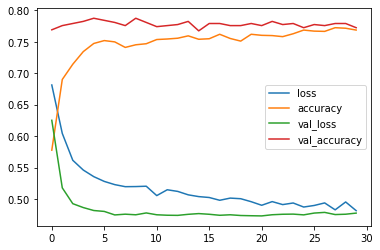

In [262]:
# plotting the performance of the model
perf = pd.DataFrame(model.history.history)
perf.plot()

## Testing the classification ability of the model created

In [263]:
y_pred = model.predict_classes(x_test)

C:\Users\amalr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [264]:
from sklearn.metrics import classification_report
print("Performance of the model :")
print(classification_report(y_test,y_pred))

Performance of the model :
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       348
           1       0.78      0.78      0.78       400

    accuracy                           0.77       748
   macro avg       0.76      0.76      0.76       748
weighted avg       0.77      0.77      0.77       748

